<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/AA_GRUPO3/blob/main/AA_PRACTICA1_GRUPO3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


## DATOS

### Cargamos el dataset

In [ ]:
# CARGAMOS EL CONJUNTO DE DATOS MINIST EN KERAS
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
print(train_images.shape)

(60000, 28, 28)


In [ ]:
# Vemos la matriz de la imagen número 0 (28x28)
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[0]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

In [ ]:
# La imagen anterior corresponde con la bota asociada al número 9. Hasta se puede intuir.... 
train_labels[0]

9

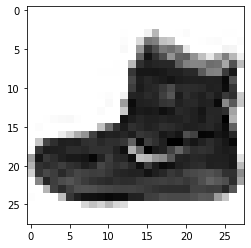

In [ ]:
# Veamos el elemento 0 y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Preprocesamiento

In [ ]:
# PREPARAMOS LOS DATOS DE IMAGEN CON ALGUNA TRANSFORMACIÓN. NORMALIZACION
# Los tensores transformados tienen la misma cantidad de datos total que el 
# tensor inicial

# Imagenes y etiquetas de entrenamiento.
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
# Imagenes y etiquetas de test.
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
# PREPARACIÓN LAS ETIQUETAS
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

##MODELOS

En esta sección se definen y entrenan cada uno de los 8 modelos que se estudian en esta práctica.

Para simplificar el archivo, se emparejan 2 a 2 los modelos que solo se diferencian en el paso de compilación

In [ ]:
# Librerías a utilizar para construir los modelos
from keras import models
from keras import layers

In [ ]:
# Definimos variables que van a contener los resultados de los entrenamientos
HISTORY = []
TEST_LOSS = []
TEST_ACC = []

### Modelo 1 y 2

In [ ]:
# ARQUITECTURA DE LA RED
Modelo1 = models.Sequential()
Modelo1.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
Modelo1.add(layers.Dense(10, activation='softmax'))

Modelo2 = models.Sequential()
Modelo2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
Modelo2.add(layers.Dense(10, activation='softmax'))

Modelo1.summary() # Summary de Modelo1 es igual que el de Modelo2
# Nombre de las capas automáticos a no ser que lo definamos
# 7.850 = 784 x 10 + 10 Sesgo
# 110 = 10x10 + 10 Sesgo
# 7.960 = 7.850 + 110

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                7850      
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# COMPILACIÓN DE LOS MODELOS
Modelo1.compile(optimizer='sgd', # Optimizador 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Modelo2.compile(optimizer='rmsprop', # Optimizador 'rmsprop' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy', # Función de pérdida
                metrics=['accuracy']) # Mética de Precisión

In [ ]:
# ENTRENAMOS EL MODELO 1 CON EL JUEGO DE DATOS DE ENTRENAMIENTO
history_M1 = Modelo1.fit(train_images, train_labels, epochs=5, batch_size=128)
HISTORY.append(history_M1)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.3861 - accuracy: 0.5605
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.8108 - accuracy: 0.7401
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.6949 - accuracy: 0.7692
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6350 - accuracy: 0.7867
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5952 - accuracy: 0.7998


In [ ]:
# ENTRENAMOS EL MODELO 2 CON EL JUEGO DE DATOS DE ENTRENAMIENTO
history_M2 = Modelo2.fit(train_images, train_labels, epochs=5, batch_size=128)
HISTORY.append(history_M2)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.9124 - accuracy: 0.7040
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.5222 - accuracy: 0.8232
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.4746 - accuracy: 0.8387
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4517 - accuracy: 0.8471
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4375 - accuracy: 0.8516


In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
M1_test_loss, M1_test_acc = Modelo1.evaluate(test_images, test_labels)
TEST_LOSS.append(M1_test_loss)
TEST_ACC.append(M1_test_acc)
print("\nModelo 1:")
print('test_loss:', M1_test_loss)
print('test_acc:', M1_test_acc)

M2_test_loss, M2_test_acc = Modelo2.evaluate(test_images, test_labels)
TEST_LOSS.append(M2_test_loss)
TEST_ACC.append(M2_test_acc)
print("\nModelo 2:")
print('test_loss:', M2_test_loss)
print('test_acc:', M2_test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.5982 - accuracy: 0.7924
Modelo 1:

test_loss: 0.5982087850570679
test_acc: 0.7924000024795532
313/313 [==============================] - 1s 2ms/step - loss: 0.4755 - accuracy: 0.8344
Modelo 2:

test_loss: 0.47553551197052
test_acc: 0.8343999981880188


### Modelo 3 y 4

In [ ]:
# CONSTRUIMOS LA SEGUNDA ARQUITECTURA DE LA RED
# El tipo de red será secuencial. Desde la entrada hasta la salida sin ciclos
Modelo3 = models.Sequential()
Modelo3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
Modelo3.add(layers.Dense(10, activation='softmax'))

Modelo4 = models.Sequential()
Modelo4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
Modelo4.add(layers.Dense(10, activation='softmax'))

Modelo3.summary()
# 7.850 = 784 x 10 + 10 Sesgo
# 110 = 10x10 + 10 Sesgo
# 7.960 = 7.850 + 110

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                7850      
                                                                 
 dense_41 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# COMPILACIÓN DEL MODELO  
Modelo3.compile(optimizer='sgd', # Optimizador 'rmsprop' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy', # Función de pérdida
                metrics=['accuracy']) # Mética de Precisión

Modelo4.compile(optimizer='rmsprop', # Optimizador 'rmsprop' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy', # Función de pérdida
                metrics=['accuracy']) # Mética de Precisión

In [ ]:
# ENTRENAMOS EL MODELO 3 CON EL JUEGO DE DATOS DE ENTRENAMIENTO
history_M3 = Modelo3.fit(train_images, train_labels, epochs=5, batch_size=128)
HISTORY.append(history_M3)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 2.1183 - accuracy: 0.2830
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 1.7962 - accuracy: 0.4539
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 1.5903 - accuracy: 0.5484
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 1.4373 - accuracy: 0.5997
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 1.3181 - accuracy: 0.6246


In [ ]:
# ENTRENAMOS EL MODELO 4 CON EL JUEGO DE DATOS DE ENTRENAMIENTO
history_M4 = Modelo4.fit(train_images, train_labels, epochs=5, batch_size=128)
HISTORY.append(history_M4)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 1.3692 - accuracy: 0.6563
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.8077 - accuracy: 0.7723
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6181 - accuracy: 0.8064
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.5353 - accuracy: 0.8270
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.4923 - accuracy: 0.8356


In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
M3_test_loss, M3_test_acc = Modelo3.evaluate(test_images, test_labels)
TEST_LOSS.append(M3_test_loss)
TEST_ACC.append(M3_test_acc)
print('\nModelo 3')
print('test_loss:', M3_test_loss)
print('test_acc:', M3_test_acc)

M4_test_loss, M4_test_acc = Modelo4.evaluate(test_images, test_labels)
TEST_LOSS.append(M4_test_loss)
TEST_ACC.append(M4_test_acc)
print('\nModelo 4')
print('test_loss:', M4_test_loss)
print('test_acc:', M4_test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.2714 - accuracy: 0.6274

Modelo 3
test_loss: 1.2713757753372192
test_acc: 0.6273999810218811
313/313 [==============================] - 1s 2ms/step - loss: 0.5055 - accuracy: 0.8283

Modelo 4
test_loss: 0.5054709911346436
test_acc: 0.8282999992370605


### Modelo 5 y 6

In [ ]:
# CONSTRUIMOS LA SEGUNDA ARQUITECTURA DE LA RED
# El tipo de red será secuencial. Desde la entrada hasta la salida sin ciclos
Modelo5 = models.Sequential()
Modelo3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
Modelo3.add(layers.Dense(10, activation='softmax'))

Modelo3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                7850      
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# COMPILACIÓN DEL MODELO
Modelo3.compile(optimizer='sgd',                 # Optimizador 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy', # Función de pérdida
                metrics=['accuracy'])            # Mética de Precisión

In [ ]:
# ENTRENAMOS LOS DATOS DE ENTRENAMIENTO
# Ahora ponemos un total de 5 épocas (batch_size=128)
history_M3 = Modelo3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 2.0725 - accuracy: 0.3400
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 1.7613 - accuracy: 0.5942
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 1.5630 - accuracy: 0.6415
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 1.4174 - accuracy: 0.6612
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 1.3056 - accuracy: 0.6727


In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
M3_test_loss, M3_test_acc = Modelo3.evaluate(test_images, test_labels)
print('\ntest_loss:', M3_test_loss)
print('test_acc:', M3_test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.2652 - accuracy: 0.6739

test_loss: 1.2652149200439453
test_acc: 0.6739000082015991


El optimizador Adam (Adaptive moment estimation) es el método de optimización más utilizado en la actualidad ya que combina RMSProp, utilizado en otros modelos en esta práctica y AdaGrad (Adaptive Gradient Algorithm).


Es el algoritmo de optimizacion que converge más rapido

---



In [ ]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL  OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
network.compile(optimizer='adam',                       # Optimizador 'adam' (Adaptive moment estimation)
                loss='sparse_categorical_crossentropy', # Función de pérdida
                metrics=['accuracy'])                   # Mética de Precisión

### Modelo 7 y 8

### Variantes

## RESULTADOS

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

### Funciones para graficar

In [ ]:
# Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

def show_confusion_matrix(predictions):
    # Predicción de valores desde el dataset de validación
    Y_pred = predictions
    # Convertir en predicciones de clases desde los vectores one-hot encoding 
    Y_pred_classes = np.argmax(Y_pred, axis = 1) 
    # Convertir en clases de observación desde los vectores one-hot encoding
    Y_true = np.argmax(test_labels, axis = 1) 
    # Computar la matriz de confusión
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # Dibujar la matriz de confusión
    plot_confusion_matrix(confusion_mtx, classes = range(10))

# Prediction distributions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)    

    predicted_label = np.argmax(predictions_array)
    if predicted_label.all() == true_label.all():
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                  100*np.max(predictions_array),
                                  true_label),
                                  color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('black')

def show_predicted_distributions(predictions, n):
    Y_true = np.argmax(test_labels, axis = 1)
    for i in range(n):
      plt.figure(figsize=(6,3))
      plt.subplot(1,2,1)
      plot_image(i, predictions[i], Y_true, test_images.reshape(10000,28,28))
      plt.subplot(1,2,2)
      plot_value_array(i, predictions[i],  Y_true)
      plt.show()
      plt.clf()

## Curvas de aprendizaje

In [ ]:
# Plot con las curvas de aprednizaje obtenidas a partir de la lista HISTORY (crear función en apartado Funciones para graficar)

## Matrices de confusión

In [ ]:
predictions1 = Modelo1.predict(test_images)
predictions2 = Modelo2.predict(test_images) 

313/313 [==============================] - 2s 7ms/step


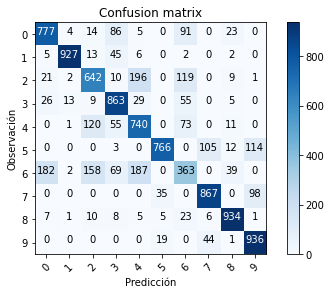

In [ ]:
# Modelo 1
show_confusion_matrix(predictions1)

In [ ]:
# Modelo 2
show_confusion_matrix(Modelo2, test_labels)

In [ ]:
# Modelo 3
show_confusion_matrix(Modelo3, test_labels)

## Distribución de predicciones

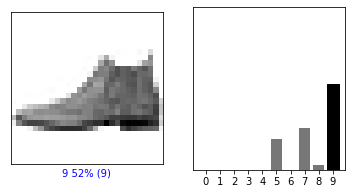

<Figure size 432x288 with 0 Axes>

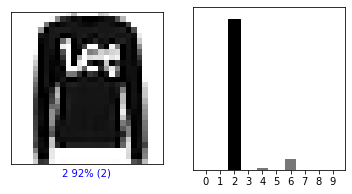

<Figure size 432x288 with 0 Axes>

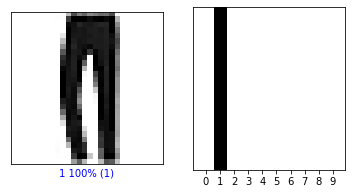

<Figure size 432x288 with 0 Axes>

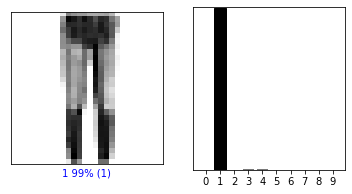

<Figure size 432x288 with 0 Axes>

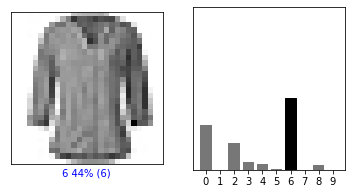

<Figure size 432x288 with 0 Axes>

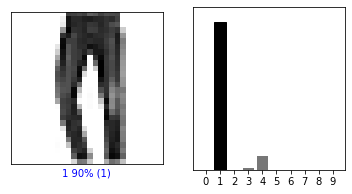

<Figure size 432x288 with 0 Axes>

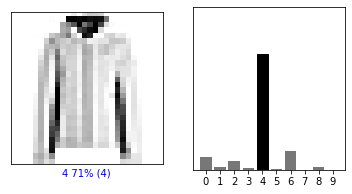

<Figure size 432x288 with 0 Axes>

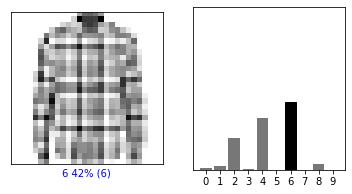

<Figure size 432x288 with 0 Axes>

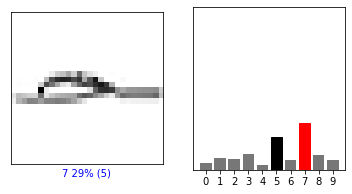

<Figure size 432x288 with 0 Axes>

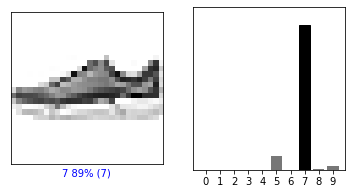

<Figure size 432x288 with 0 Axes>

In [ ]:
show_predicted_distributions(predictions1, 10)

## Test error y Test accuracy

In [ ]:
# Gráfica de barras horizontales con los errores y accuracy de cada modelo (TEST_LOSS, TEST_ACC) 
# Crear función en apartado Funciones para graficar